# Pileup and Jet ID

## Loading packages and input files

In [15]:
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import hist
import awkward as ak
import matplotlib.pyplot as plt
import mplhep as hep
import uproot

plt.style.use(hep.style.CMS)

In [2]:
fname = "root://cmseos.fnal.gov//store/user/cmsdas/2023/short_exercises/jets/RunIISummer20UL18NanoAODv9/QCD_Pt-15to7000_TuneCP5_Flat2018_13TeV_pythia8/NANOAODSIM/20UL18JMENano_106X_upgrade2018_realistic_v16_L1v1-v1/30000/792B4CD3-A001-F94F-9AAB-D74D532DE610.root"
events = NanoEventsFactory.from_root( fname, schemaclass=NanoAODSchema.v6).events()

## Exercise 1: Pileup event variables

Let's make histograms of different pileup event variables and look at their distributions:

In [3]:
hists = (
    hist.Hist.new
    .Reg(100, 0, 100, name="npu", label='NPU')
    .Reg(100, 0, 100, name="mu", label='mu')
    .Reg(100, 0, 100, name="rho", label='rho')
    .Reg(100, 0, 100, name="npv", label='NPV')
    .Weight()
    .fill(
        npu=events.Pileup.nPU,
        mu=events.Pileup.nTrueInt,
        rho=events.fixedGridRhoFastjetAll,
        npv= events.PV.npvs
    )
)

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f1c608f3670>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f1c609153d0>, text=[])

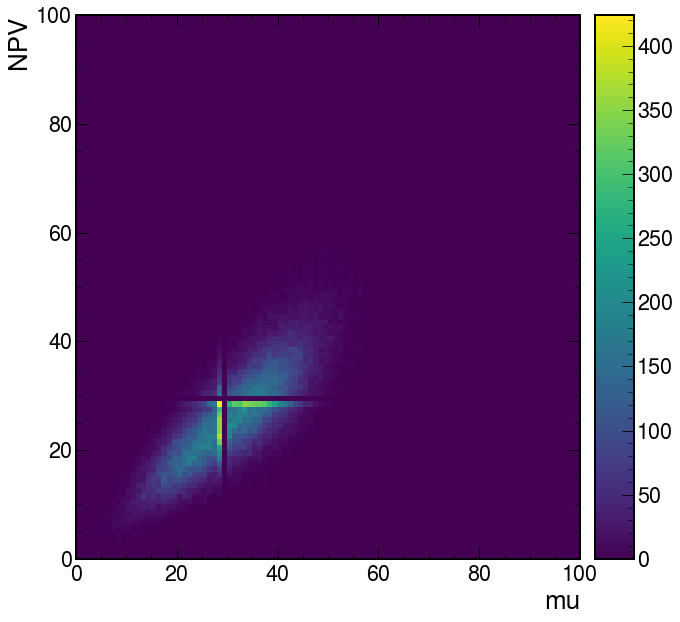

In [16]:
hists.project('mu', 'npv').plot2d()

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f1cd6a87b50>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f1cd6a87f40>, text=[])

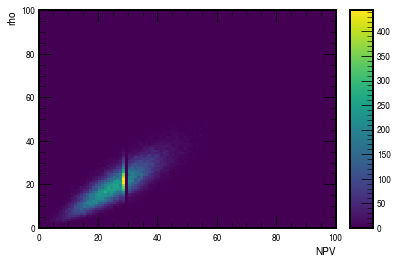

In [5]:
hists.project('npv', 'rho').plot2d()

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f1cd67eb640>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f1cd680b280>, text=[])

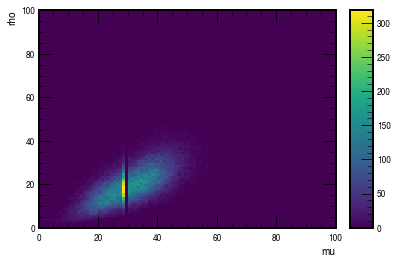

In [6]:
hists.project('mu', 'rho').plot2d()

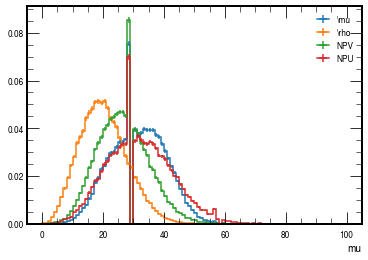

In [7]:
fig, ax = plt.subplots()

hists.project('mu').plot1d(ax=ax, density=True, label=r"\mu")
hists.project('rho').plot1d(ax=ax, density=True, label=r'\rho')
hists.project('npv').plot1d(ax=ax, density=True, label='NPV')
hists.project('npu').plot1d(ax=ax, density=True, label='NPU')

ax.legend()

<font color='red'>**IMPORTANT** </font> The spikes that you see in the plot are a bug in the files, which is corrected once it is properly processed, you can ignore them for this exercise.

## Exercise 2: Pileup Reweighting 

Here we are going to produce a file containing the weights used for pileup reweighting. Please note that this process can take quite a while. Execute the following command in your ssh session and be patient!


In [ ]:
# python $CMSSW_BASE/src/Analysis/JMEDAS/python/pileupCorr.py -j $CMSSW_BASE/src/Analysis/JMEDAS/data/Cert_271036-284044_13TeV_PromptReco_Collisions16_JSON_NoL1T.txt -l $CMSSW_BASE/src/Analysis/JMEDAS/data/pileup_latest.txt -b 100

In the meantime, the first question is asked here, at the beginning of this section, in order to give you a chance to think about the answers before you produce the plots. Ask yourself what pileup reweighting is doing. Try to answer the questions and do the exercise before looking at the answer.

<font color='red'>Question 1: How large do you expect the pileup weights to be?</font>

<font color='red'>Question 2: In what unit will the x-axis be plotted? Another way of asking this is what pileup variable can be measured in both data and MC and is fairly robust?</font><details>
<summary><font color='blue'>Show answer...</font></summary>
The x-axis is plotted as a function of $\mu$ as this is a true measurement of pileup (additional interactions) and not just some variable which is correlated with pileup. Other options might have been $N_{PV}$, which has an efficiency which is less than 100%, and $\rho$, which assumes that the pileup energy density is uniform. We also get different values of $\rho$ if we measure it for different regions in $\eta$ (i.e. $|\eta|<3$ or $|\eta|<5$).

<img src="../files/Zmumu_npv.png" alt="Zmumu_npv" width="400px" style="float: left;" />
<img src="../files/Zmumu_rho.png" alt="Zmumu_rho" width="400px" style="float: right;" />
<img src="../files/Zmumu_npv_nputruth.png" alt="Zmumu_npv_nputruth" width="400px" style="float: left;" />
<img src="../files/Zmumu_rho_nputruth.png" alt="Zmumu_rho_nputruth" width="400px" style="float: right;" />
</details>

While you're waiting for pileupCorr.py to finish, you might want to take a look at the input files to see what information they contain and how they are formatted.

Once the process is finished, execute the simple plotting script below with 'python pileup_reweighting.py' and open the produced pdf.

In [ ]:
# # Loads the ROOT environment and style
# import ROOT as r
# from Analysis.JMEDAS.pileupCorr import *

# inf = r.TFile("PileupHistograms.root","READ")
# c = MakeCanvas(filename="PileupHistograms.root")
# c.Draw()c.Print('pileup_reweighting.pdf','pdf')

<font color='red'>Question 3: Did the weights look as you expected them to?</font>

<font color='red'>Question 4: Why do the green and red histograms end arount $\mu\approx38$?</font>

<font color='red'>Question 5: What is the limiting factor on the black histogram? Why doesn't it continue to higher $\mu$ values?</font>

<font color='red'>Question 6: Did the method close? In other words, can we derive weights from the pileup distribution in a given MC sample, apply those weights to the same MC sample, and get back a distribution that looks just like data?</font>

Take a look at the MakeCanvas function in the pileupCorr module to see how this plot is made. This will help you to understand how to apply the pileup weights in your own analysis. You can also take a look at the other modules in the pileupCorr.py code to see how the pileup weights, and their associated systematics, are created.

More information about pileup reweighting and the centrally available utilities can be found [here](https://twiki.cern.ch/twiki/bin/viewauth/CMS/PileupJSONFileforData).

In [17]:
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import hist
import awkward as ak
import matplotlib.pyplot as plt
import mplhep as hep
import correctionlib

plt.style.use(hep.style.CMS)

In [18]:
fname = "root://xrootd-cms.infn.it//store/mc/RunIISummer20UL18NanoAODv9/TTJets_TuneCP5_13TeV-amcatnloFXFX-pythia8/NANOAODSIM/20UL18JMENano_106X_upgrade2018_realistic_v16_L1v1-v1/2520000/47A0D984-2D6F-0D42-B5CB-906786434349.root"
events = NanoEventsFactory.from_root( fname, schemaclass=NanoAODSchema.v6).events()

In [19]:
correction_file = "/cvmfs/cms.cern.ch/rsync/cms-nanoAOD/jsonpog-integration/POG/LUM/2018_UL/puWeights.json.gz"
pu_weight_corr = list(correctionlib.CorrectionSet.from_file(correction_file).values())[0]

In [20]:
pu_weight = pu_weight_corr.evaluate( events.Pileup.nTrueInt.to_numpy(), 'nominal' )

In [24]:
hists = (
    hist.Hist.new
    .Reg(100, 0, 100, name="pu")
    .Reg(200, 0, 2, name="puweight")
    .Weight()
    .fill(
        puweight=pu_weight,
        pu=events.Pileup.nTrueInt.to_numpy()
    )
)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


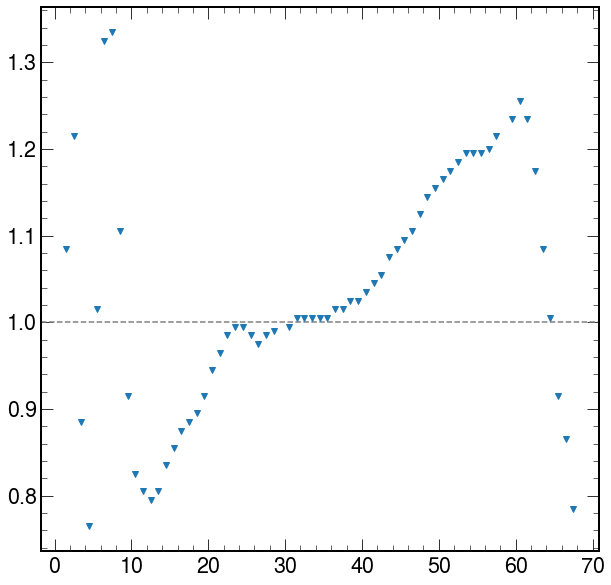

In [27]:
fig, axs = plt.subplots()

axs.axhline(y=1, color='gray', linestyle='--')

# h = output['ptRatio_Zsjet'][:,::,:,-2.5j:2.5j:sum].project('pt','ptRatio_Zsj')[::5j,:]
axs.errorbar(
    x= hists.axes[0].centers,
    y= hists.profile('puweight').values(),
#     yerr= abs(h.profile('ptRatio_Zsj').variances()),
#     xerr=np.ones(len(h.axes[0].centers))*2.5,
#     label="chs",
    marker='v', linestyle="",
)
axs.legend()
# axs.set_xlabel('softjet $p_{T}$ [GeV]')
# axs.set_ylabel('$p_{T}$ Ratio (Z boson/soft jet)')

## Exercise 3: Jet ID

Let's create a histogram with the jetId information:

In [8]:
hists3 = (
    hist.Hist.new
    .Reg(50, 0, 500, name="pt")
    .Reg(40, -5, 5, name="eta")
    .Reg(10, 0, 10, name="jetId")
    .Weight()
    .fill(
        pt=ak.flatten(events.Jet.pt),
        eta=ak.flatten(events.Jet.eta),
        jetId=ak.flatten(events.Jet.jetId),
    )
)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f1c60a43d30>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

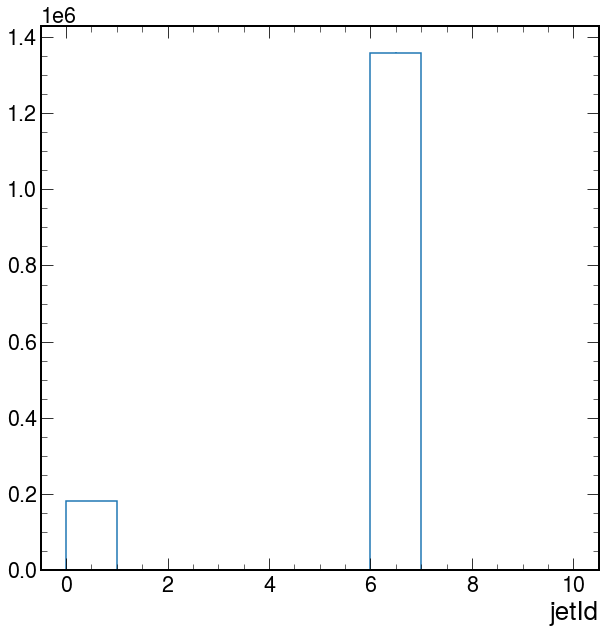

In [14]:
hists3.project("jetId").plot1d()

Let's apply a simple selection to the `events.Jet` collection to remove those jets:

In [10]:
jets = events.Jet[events.Jet.jetId>=2]

hists4 = (
    hist.Hist.new
    .Reg(50, 0, 500, name="pt")
    .Reg(40, -5, 5, name="eta")
    .Reg(10, 0, 10, name="jetId")
    .Weight()
    .fill(
        pt=ak.flatten(jets.pt),
        eta=ak.flatten(jets.eta),
        jetId=ak.flatten(jets.jetId),
    )
)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f1cd40233a0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

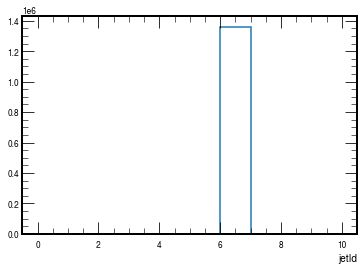

In [11]:
hists4.project("jetId").plot1d()

## Your turn

How different do the other jet distributions look like with jetId implemented?